세계보건기구(WHO)에 따르면 뇌졸중은 전 세계 사망 원인 2위이며 전체 사망의 약 11%를 차지합니다.

환자가 뇌졸중에 걸릴 가능성이 있는지 예측

In [ ]:
# 경고 안보이게 하기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
df.shape

(5110, 12)

In [ ]:
# 결측치
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df= df.fillna(df.mean())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
# gender에서 'Other' 제거
df = df[(df['gender'] != 'Other')]

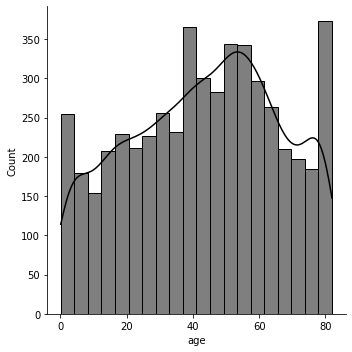

In [ ]:
# 데이터 탐색
# numeric/continuous 분포
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['age'], kde=True, color='black')

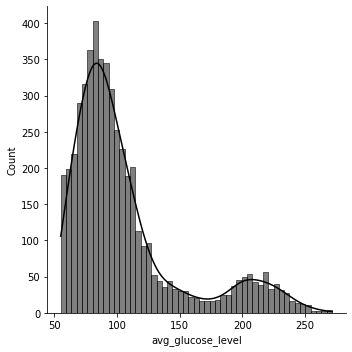

In [ ]:
sns.displot(df['avg_glucose_level'], kde=True, color='black')

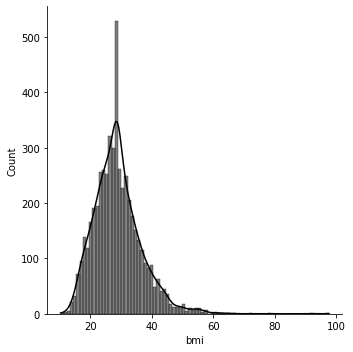

In [ ]:
sns.displot(df['bmi'], kde=True, color='black')

수치형 변수들의 분포를 살펴본 결과 혈당수치와 BMI에서 right-skewed를 확인했습니다.

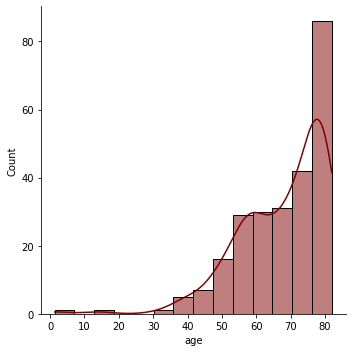

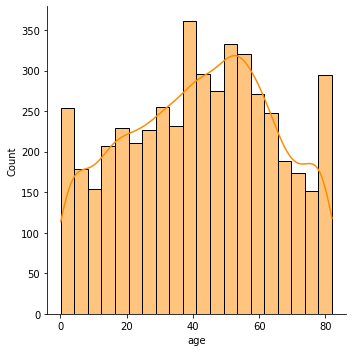

In [ ]:
# 뇌졸중을 앓은 변수와 그렇지 않은 변수의 수치 변수 분포 확인
s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

sns.displot(s['age'], kde=True, color='maroon')
sns.displot(ns['age'], kde=True, color='darkorange')

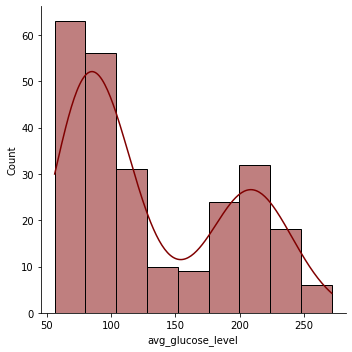

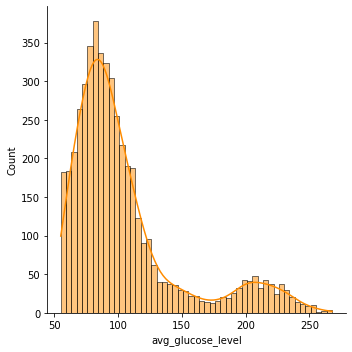

In [ ]:
sns.displot(s['avg_glucose_level'], kde=True, color='maroon')
sns.displot(ns['avg_glucose_level'], kde=True, color='darkorange')

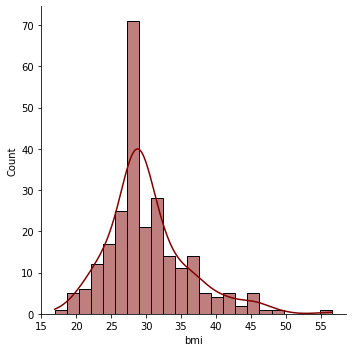

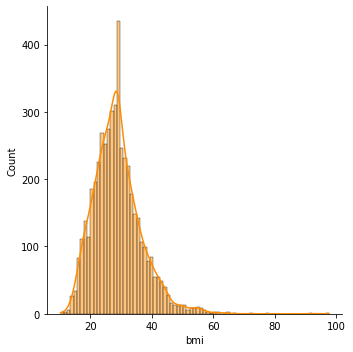

In [ ]:
sns.displot(s['bmi'], kde=True, color='maroon')
sns.displot(ns['bmi'], kde=True, color='darkorange')

나이가 뇌졸중 환자에게 큰 요인으로 보입니다.

나이가 들수록  더 위험합니다.

나이보다는 덜 분명하지만 혈당 수치와 bmi도 차이가 있습니다.

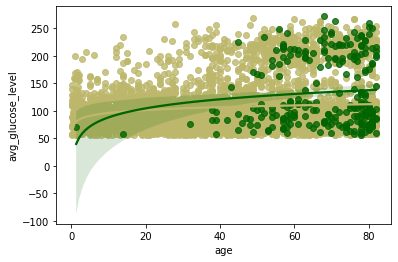

In [ ]:
# 나이와 혈당, bmi 비교 
sns.regplot(ns['age'], y=ns['avg_glucose_level'],
            color='darkkhaki',
            logx=True)

sns.regplot(s['age'], y=s['avg_glucose_level'],
            color='darkgreen',
            logx=True)

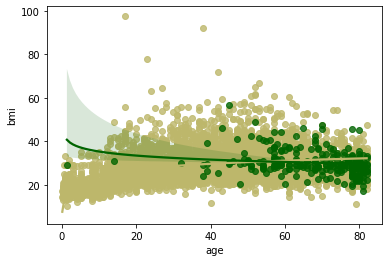

In [ ]:
sns.regplot(ns['age'], y=ns['bmi'],
            color='darkkhaki',
            logx=True)

sns.regplot(s['age'], y=s['bmi'],
            color='darkgreen',
            logx=True)

역시 나이는 큰 요인이며 평균 혈당 수치와 bmi와도 관계가 있습니다.


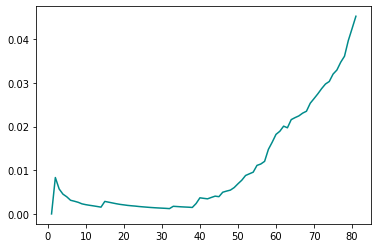

In [ ]:
df['age'] = df['age'].astype(int)

rate=[]

for i in range(df['age'].min(), df['age'].max()):
  rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate, color='darkcyan')

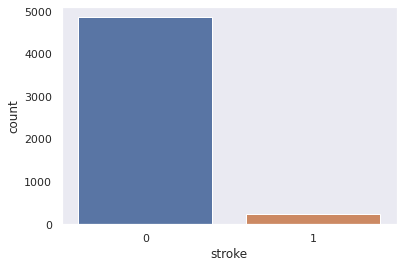

0    4860
1     249
Name: stroke, dtype: int64


In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='stroke')
plt.show()

print(df.stroke.value_counts())

뇌졸중을 앓은 적이 있는 아닌 경우에 비해 너무 적은 양이므로 데이터 불균형이 매우 큽니다.

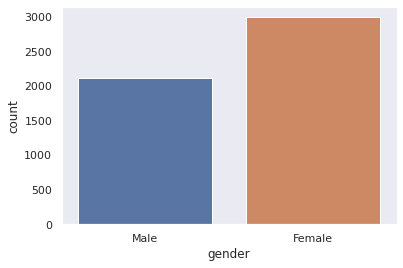

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='gender')
plt.show()

df['gender'].value_counts()

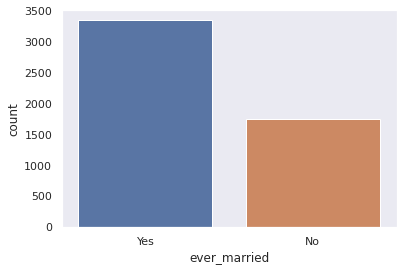

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='ever_married')
plt.show()

df['ever_married'].value_counts()

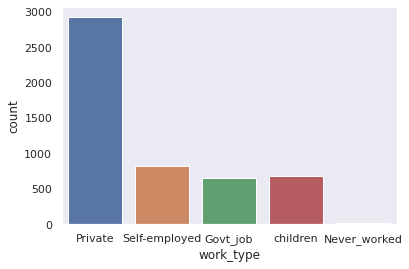

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='work_type')
plt.show()

df['work_type'].value_counts()

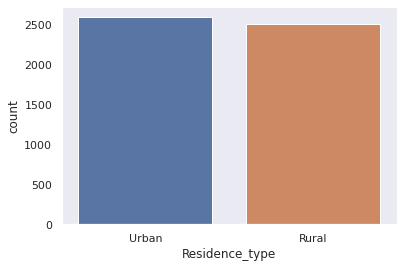

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='Residence_type')
plt.show()

df['Residence_type'].value_counts()

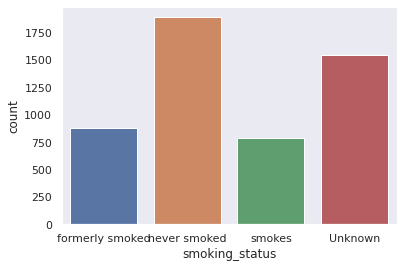

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
sns.set_theme(style='dark')
ax = sns.countplot(data=df, x='smoking_status')
plt.show()

df['smoking_status'].value_counts()

In [ ]:
# 범주형 값 인코딩
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': -1, 'Never_worked': -2}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)

In [ ]:
df.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       0   67             0              1             1          0   
1       1   61             0              0             1          1   
2       0   80             0              1             1          0   
3       1   49             0              0             1          0   
4       1   79             1              0             1          1   

   Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0               1             228.69  36.600000  formerly smoked       1  
1               0             202.21  28.893237     never smoked       1  
2               0             105.92  32.500000     never smoked       1  
3               1             171.23  34.400000           smokes       1  
4               0             174.12  24.000000     never smoked       1

In [ ]:
# 베이스라인
print('Inverse of Null Accuracy: ',249/(249+4860))
print('Null Accuracy: ', 4860/(249+4860))

# 뇌졸중 걸릴 확률을 찾고 있기 때문에 정확도는 약 5%이지만 블균형 데이터셋이기 때문에 
# 반대의 정확도를 베이스라인으로 삼겠습니다.
# 데이터 분리
X = df.drop(['stroke', 'smoking_status'], axis=1)
y = df['stroke']

Inverse of Null Accuracy:  0.04873752201996477
Null Accuracy:  0.9512624779800353


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4087, 9), (1022, 9), (4087,), (1022,))

In [ ]:
# 모델링
# 데이터 세트 균형 맞추기 
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train, y_train = over.fit_resample(X_train, y_train.ravel())

In [ ]:
# 모델링 -> Random Froest, Logistic Regression, 교차 검증
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_pipeline = Pipeline(steps = [('scale', StandardScaler()), 
                                ('RF', RandomForestClassifier(random_state=42))])
lr_pipeline = Pipeline(steps = [('scale', StandardScaler()), 
                                ('LR', LogisticRegression(random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score
rf_cv = cross_val_score(rf_pipeline, X_train, y_train, cv=10, scoring ='f1')
lr_cv = cross_val_score(lr_pipeline, X_train, y_train, cv=10, scoring='f1')

In [ ]:
print('Random Forest mean', rf_cv.mean())
print('Logisitic Regression mean', lr_cv.mean())

Random Forest mean 0.9446029014839515
Logisitic Regression mean 0.8195873061818076


랜덤 포레스트가 가장 잘 수행되었습니다.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
lr_pred = lr_pipeline.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [ ]:
from sklearn.metrics import accuracy_score
print('Random Forest F1 score: ', rf_f1)
print('Logistic regression F1 score: ', lr_f1)

Random Forest F1 score:  0.18181818181818182
Logistic regression F1 score:  0.2534246575342466


In [ ]:
from sklearn.metrics import classification_report
print('Accuracy score: ', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Accuracy score:  0.8855185909980431
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.16      0.21      0.18        62

    accuracy                           0.89      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.90      0.89      0.89      1022



In [ ]:
# recall이 너무 낮으므로 GridSearchCV 사용
from sklearn.model_selection import GridSearchCV
n_estimators = [1, 20, 30, 40, 50, 100, 150, 200]
max_features = [1, 2, 3, 4, 5, 6, 7]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 20, 30, 40, 50, 100, 150, 200]})

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

In [ ]:
rfc = RandomForestClassifier(max_features=4, n_estimators=200, bootstrap=False)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc_pred))
print('Accurac Score: ', accuracy_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.16      0.16      0.16        62

    accuracy                           0.90      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022

Accurac Score:  0.8962818003913894
F1 Score:  0.15873015873015875


In [ ]:
# Logistic Regression
penalty = ['l1', '12', 'none']
C = [ 0.001, 0.01, 0.1, 1, 10, 100]
lr_param_grid = {'penalty': penalty, 
                       'C': C}
lr = LogisticRegression()
grid = GridSearchCV(lr, lr_param_grid)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', '12', 'none']})

In [ ]:
grid.best_params_

{'C': 0.001, 'penalty': 'none'}

In [ ]:
lr_pipeline = Pipeline(steps = [('scale', StandardScaler()),
                                       ('LR', LogisticRegression(C=0.001, penalty = 'none', random_state=42))])
lr_pipeline.fit(X_train, y_train)
lr.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_pred))
print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print('F1 Score: ', f1_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.16      0.58      0.25        62

    accuracy                           0.79      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.92      0.79      0.84      1022

Accuracy Score:  0.7857142857142857
F1 Score:  0.24742268041237112


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

lr_prob = lr_pipeline.predict_proba(X_test)
lr_prob = lr_prob[:, 1]
lr_auc = roc_auc_score(y_test, lr_prob)

In [ ]:
# roc 곡선 계산
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_prob)

In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='royalblue', linewidth=5)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.show

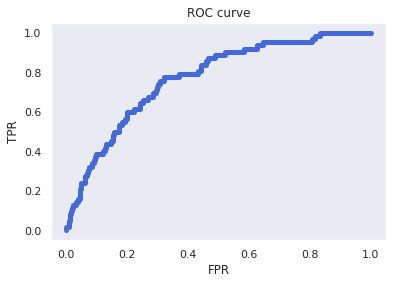

In [ ]:
plot_roc_curve(lr_fpr, lr_tpr)

In [ ]:
from sklearn.metrics import recall_score, precision_score

rf_df = pd.DataFrame(data=[f1_score(y_test, rf_pred),
                           accuracy_score(y_test, rf_pred),
                           recall_score(y_test, rf_pred),
                           precision_score(y_test,rf_pred),
                           roc_auc_score(y_test, rf_pred)],
                     columns=['Random Forest Score'],
                     index=['F1', 'Accuracy', 'Recall', 'Precision', 'ROC AUC Score'])

lr_df = pd.DataFrame(data=[f1_score(y_test, lr_pred),
                           accuracy_score(y_test, lr_pred),
                           recall_score(y_test, lr_pred),
                           precision_score(y_test, lr_pred),
                           roc_auc_score(y_test, lr_pred)],
                     columns=['Logistic Regression Score'],
                     index=['F1', 'Accuracy', 'Recall', 'Precision', 'ROC AUC Score'])

In [ ]:
# 모델 비교 
df_models = round(pd.concat([rf_df, lr_df], axis=1),3)

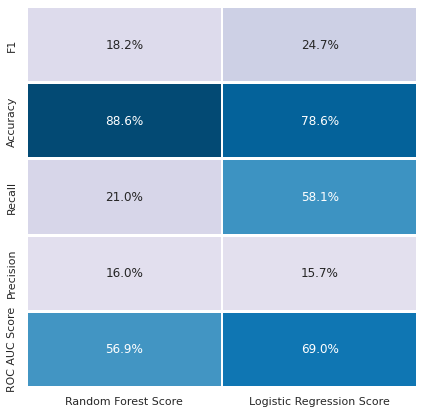

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df_models, cmap='PuBu', annot=True, fmt='.1%', vmin=0, vmax=0.95, linewidths=2, cbar=False)
plt.show()

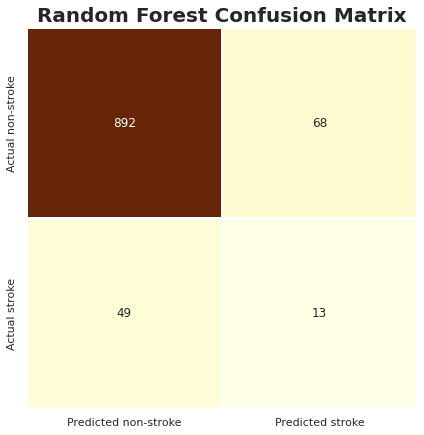

In [ ]:
# confusion matrix
fig = plt.figure(figsize=(7, 7))

sns.heatmap(rf_cm, cmap='YlOrBr', annot=True, fmt='d', linewidths=2, cbar=False, 
            xticklabels=['Predicted non-stroke', 'Predicted stroke'],
            yticklabels=['Actual non-stroke', 'Actual stroke'])
plt.title('Random Forest Confusion Matrix', fontsize=20, fontweight='bold')
plt.show()

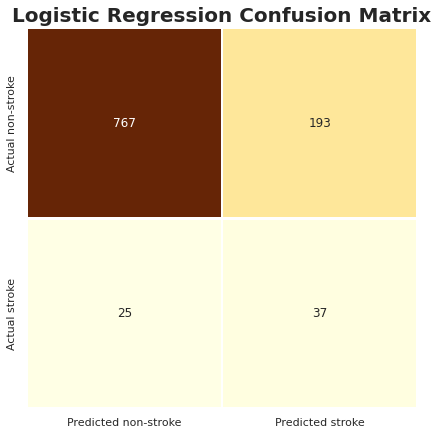

In [ ]:
fig = plt.figure(figsize=(7, 7))

sns.heatmap(lr_cm, cmap='YlOrBr', annot=True, fmt='d', linewidths=2, cbar=False, 
            xticklabels=['Predicted non-stroke', 'Predicted stroke'],
            yticklabels=['Actual non-stroke', 'Actual stroke'])
plt.title('Logistic Regression Confusion Matrix', fontsize=20, fontweight='bold')

plt.show()

모델 정확도는 랜덤포레스트가 약 90%로 가장 높게 나왔습니다.

재현율은 전반적으로 낮게 나왔습니다.

실제로 뇌졸중이 예상되는 사람들에게 예방치료를 제공하는 것이 중요하므로 재현율이 높은 모델일수록 좋은 모델이라고 생각합니다.

랜덤 포레스트는 가장 높은 정확도를 가졌지만 재현율이 너무 낮기 때문에 로지스틱 회귀로 수행한 모델이 더 낫다고 생각합니다.

로지스틱 회귀는 정확도가 랜덤 포레스트보다 낮은 약 78% 이지만 재현율은 60%로 상대적으로 높게 나왔고,  f1 score도 약 24%로 상대적으로 높게 나왔습니다.

먼저 정확도가 가장 높은 모델인 랜덤포레스트가 어떻게 예측하는지 보기 위해 더 분석을 해보겠습니다.

In [ ]:
def rf_importance(m, df):
  return pd.DataFrame({'Feature': df.columns, 
                       'Importance': m.feature_importances_}).sort_values('Importance', ascending=False)
fi = rf_importance(rf_pipeline['RF'], X)

In [ ]:
fi.style.background_gradient(cmap='binary')

여기서도 나이, 혈당 수치, bmi가 중요한 요소라는 것을 알 수 있습니다.

work_type도 두드러진다는 점을 알 수 있습니다.


SHAP도 사용해보겠습니다.
SHAP 값은 예측을 세분화하여 각 feature의 영향을 보여줍니다.

역시 랜덤포레스트 모델에 사용해보겠습니다.


In [ ]:
! pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

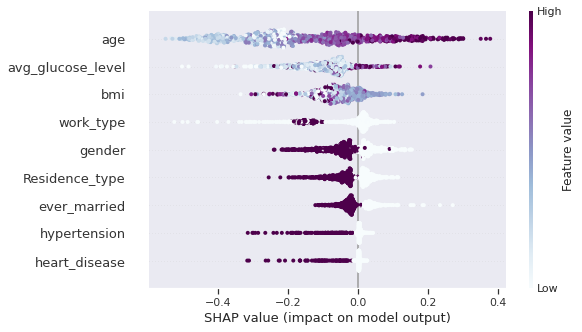

In [ ]:
shap.summary_plot(shap_values[1], X_test, cmap='BuPu')

랜덤포레스트 모델이 뇌졸중을 앓지 않은 경우를 예측하는 쪽으로 크게 치우친 것을 볼 수 있습니다.



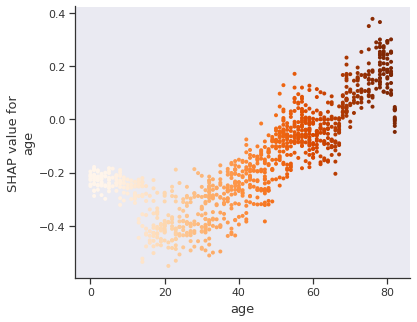

In [ ]:
shap.dependence_plot('age', shap_values[1], X_test, interaction_index='age', cmap='Oranges')

나이 변수가 증가하면 shap값도 증가하여 환자를 뇌졸중에 앓는 경우에 더 가깝게 만듭니다.

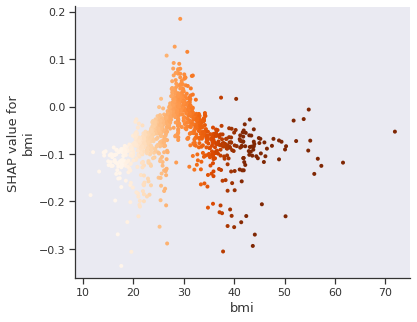

In [ ]:
shap.dependence_plot('bmi', shap_values[1], X_test, interaction_index='bmi', cmap='Oranges')

bmi가 30보다 클 경우 뇌졸중이 더 흔해지는 것을 확인했습니다.

로지스틱 회귀 모델이 가장 높은 재현율이 나왔으므로 설명을 위해 eli5를 사용해보겠습니다.

In [ ]:
! pip install eli5

In [ ]:
import eli5
columns_ = ['age', 'avg_glucose_level', 'bmi', 'work_type', 'gender', 
          'ever_married', 'Residence_type', 'hypertension', 'heart_disease']
eli5.show_weights(lr_pipeline.named_steps['LR'], feature_names=columns_)

로지스틱 회귀 모델에서는 평균 혈당 수치가 가장 중요한 변수로 확인되었습니다.

**결론 요약**
데이터 탐색을 통해 나이와 평균 혈당 수치, bmi 등 특정 feature들이 뇌졸중을 예측하는데 좋은 지표라는 것을 알았습니다.

다양한 시각화와 랜덤포레스트, 로지스틱 회귀 모델을 시도했습니다.

모델들에 하이퍼파라미터 조정을 시도하면서 결과를 개선해보았습니다.

랜덤포레스트가 가장 높은 정확도를 보였지만 로지스틱 회귀 모델이 더 높은 재현율과 f1 score가 나왔습니다.

랜덤포래스트가 사장 높은 정확도 점수를 얻기 위해 데이터를 사용하는 방법을 이해하기 위해 feature importance를 살펴보았습니다.

SHAP을 통해 feature들의 영향을 살펴보았습니다.

마지막으로 eli5를 사용하여 로지스틱 회귀 모델에서 각 feature의 중요도를 확인해보았습니다.

후에 이 프로젝트는 더 다양한 모델들을 사용해보고, 다양한 하이퍼파리미터를 조정해보면서 정확도와 재현율을 모두 높일 수 있는 방법을 연구해볼 예정입니다.